#Problem Statement
In this project we are trying to predict TATA STEEL stock's next day open price on the basis of today's stock information.

###### NOTE :

If you want to run this colab you have to first upload ' TATASTEEL.csv ' file in this colab.

First of all we are going to import some required libracies.

In [ ]:
import math
import pandas as pd
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#DATA
Now we are going to read csv file of historical data of TATA STEEL stock and after reading csv file we are going to convert it into a pandas dataframe so that we can easily update columns and rows as per our requirement.

In [ ]:
data = pd.read_csv('TATASTEEL.csv')
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.20,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.00,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.90,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.10,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.00,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,TATASTEEL,EQ,925.60,935.00,956.00,930.05,942.50,940.75,942.98,21234858,2.002407e+15,274958.0,4584617.0,0.2159
5302,2021-04-27,TATASTEEL,EQ,940.75,948.30,983.00,944.30,982.00,977.75,965.43,24904515,2.404346e+15,331493.0,3575969.0,0.1436
5303,2021-04-28,TATASTEEL,EQ,977.75,985.00,986.00,962.00,971.00,971.40,972.08,20447968,1.987700e+15,255599.0,3550908.0,0.1737
5304,2021-04-29,TATASTEEL,EQ,971.40,983.00,1036.95,983.00,1035.00,1031.35,1015.76,44718647,4.542359e+15,554647.0,5539528.0,0.1239


# Data Visualization

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.scatter(data, x='Open', y='Close', title='Open vs Close')

In [ ]:
px.scatter(data,x='Open',y='Volume',title='Open price vs. Volume')

#Data Pre-Processing

Here we have to update our "Open" column because we are going to predict next day's open price for the particular input.

In [ ]:
data['Open'] = data['Open'].shift(-1)

In [ ]:
data = data.drop([5305])

In [ ]:
data.tail(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5300,2021-04-23,TATASTEEL,EQ,921.40,935.0,945.00,910.75,924.55,925.60,930.73,24752386,2.303786e+15,307302.0,3338169.0,0.1349
5301,2021-04-26,TATASTEEL,EQ,925.60,948.3,956.00,930.05,942.50,940.75,942.98,21234858,2.002407e+15,274958.0,4584617.0,0.2159
5302,2021-04-27,TATASTEEL,EQ,940.75,985.0,983.00,944.30,982.00,977.75,965.43,24904515,2.404346e+15,331493.0,3575969.0,0.1436
5303,2021-04-28,TATASTEEL,EQ,977.75,983.0,986.00,962.00,971.00,971.40,972.08,20447968,1.987700e+15,255599.0,3550908.0,0.1737
5304,2021-04-29,TATASTEEL,EQ,971.40,1024.0,1036.95,983.00,1035.00,1031.35,1015.76,44718647,4.542359e+15,554647.0,5539528.0,0.1239


#Correlation

Correlation is a concept where we can easily check the realtion between two variables. Using this concept we can check the relation between our target column(Open) and rest of the columns.

In [ ]:
data.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.997363,0.998828,0.998424,0.997887,0.998019,0.998886,0.166846,0.420692,0.274792,0.101851,0.070886
Open,0.997363,1.000000,0.998413,0.998379,0.999350,0.999356,0.999019,0.173820,0.428153,0.290827,0.104776,0.066626
High,0.998828,0.998413,1.000000,0.998298,0.998954,0.999030,0.999427,0.177046,0.430136,0.300343,0.109852,0.067196
Low,0.998424,0.998379,0.998298,1.000000,0.998965,0.999055,0.999426,0.164436,0.420529,0.268174,0.096420,0.070986
Last,0.997887,0.999350,0.998954,0.998965,1.000000,0.999967,0.999589,0.174261,0.428728,0.290371,0.105366,0.066404
Close,0.998019,0.999356,0.999030,0.999055,0.999967,1.000000,0.999677,0.174074,0.428544,0.290052,0.105217,0.066342
VWAP,0.998886,0.999019,0.999427,0.999426,0.999589,0.999677,1.000000,0.171810,0.426506,0.286805,0.103734,0.067644
Volume,0.166846,0.173820,0.177046,0.164436,0.174261,0.174074,0.171810,1.000000,0.885759,0.924095,0.739719,-0.311530
Turnover,0.420692,0.428153,0.430136,0.420529,0.428728,0.428544,0.426506,0.885759,1.000000,0.911490,0.661855,-0.207261
Trades,0.274792,0.290827,0.300343,0.268174,0.290371,0.290052,0.286805,0.924095,0.911490,1.000000,0.691193,-0.251598


#Training And Testing Dataframe

Now we are split our whole dataset in to two parts:
1. Training Dataframe
2. Testing Dataframe

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

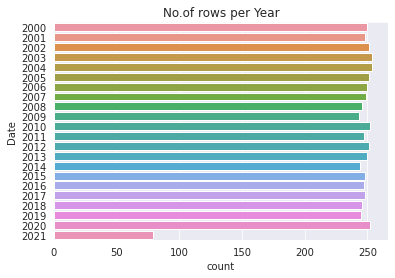

In [ ]:
#Not Required for conclusion, made for understanding
plt.title("No.of rows per Year")
sns.countplot(y = pd.to_datetime(data.Date).dt.year)

In [ ]:
year = pd.to_datetime(data.Date).dt.year

train_df = data[year<=2018]
test_df = data[year>2018]

print(train_df.shape)
print(test_df.shape)

(4729, 15)
(576, 15)


#Input And Target Columns

Now we select our input columns and target column for our machine learning model.

In [ ]:
input_cols = ['High','Low','Close','Volume']
target_col = 'Open'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Scale the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data[input_cols])

train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

#Training And Testing Models

Finally we are ready to create our machine learning model. Here are going to create 3 different models to check which model give us the highest accuracy for our input.
1. Linear Regression
2. Gradient Boosting Machine
3. Random Forest

We are train our models on training dataset and also predict values of testing dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

model1 = LinearRegression(n_jobs=-1)
model2 = XGBRegressor(n_jobs=-1)
model3 = RandomForestRegressor(n_jobs=-1,max_depth=10)

model1.fit(train_inputs,train_targets)
model2.fit(train_inputs,train_targets)
model3.fit(train_inputs,train_targets)
preds1 = model1.predict(test_inputs)
preds2 = model2.predict(test_inputs)
preds3 = model3.predict(test_inputs)

[08:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Now let's compare the model's predictions with it's actual values.

In [ ]:
# Predictions of Linear Regression
pred_linear = pd.DataFrame({
    'predicted' : preds1,
    'actual' : test_targets 
})

pred_linear.head(10)

,predicted,actual
4729,516.615023,506.00
4730,494.481435,493.00
4731,482.017111,481.00
4732,488.520859,495.40
4733,486.399839,485.65
4734,492.199257,488.95
4735,480.154694,480.00
4736,481.144872,483.95
4737,475.024862,474.20
4738,471.627263,473.00


In [ ]:
# Predictions of Gradient Boosting Machine
pred_gbm = pd.DataFrame({
    'predicted' : preds2,
    'actual' : test_targets 
})

pred_gbm.head(10)

,predicted,actual
4729,516.782471,506.00
4730,497.106262,493.00
4731,481.054535,481.00
4732,491.547150,495.40
4733,482.718689,485.65
4734,491.297455,488.95
4735,481.054535,480.00
4736,481.303192,483.95
4737,473.411865,474.20
4738,470.940857,473.00


In [ ]:
# Predictions of Random Forest Regression
pred_rf = pd.DataFrame({
    'predicted' : preds3,
    'actual' : test_targets 
})

pred_rf.head(10)

,predicted,actual
4729,515.715586,506.00
4730,494.502422,493.00
4731,479.167828,481.00
4732,489.490021,495.40
4733,482.051584,485.65
4734,494.242374,488.95
4735,480.129330,480.00
4736,480.489516,483.95
4737,478.441002,474.20
4738,471.464740,473.00


#Errors

We are going to use "Root Mean Squared Error" method to check which model give us how much error.

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(test_targets,preds1))
print(mean_squared_error(test_targets,preds2))
print(mean_squared_error(test_targets,preds3))

29.231079909409313
52.952596886586434
51.113749833497785


#Model's Accuracy

We are also print the accuarcy of each models.

In [ ]:
print(model1.score(test_inputs,test_targets))
print(model2.score(test_inputs,test_targets))
print(model3.score(test_inputs,test_targets))

0.9985822190606842
0.9974316657890937
0.9975208544988596


For more information we are also going to print the coefficients of the linear regression model.

In [ ]:
model1.coef_,model1.intercept_

(array([ 1.65519117e+01, -2.33760544e+01,  9.72975721e+02, -6.74845268e-01]),
 67.7432440187232)

We can also find the importance of every features for Gradient Boosting Machine.

In [ ]:
importance_df_gbm = pd.DataFrame({
    'feature' : train_inputs.columns,
    'importance' : model2.feature_importances_ 
}).sort_values('importance',ascending=False)

importance_df_gbm

,feature,importance
2,Close,0.960856
0,High,0.034309
1,Low,0.004694
3,Volume,0.000141


Same for Random Forest, we can find the feature importance.

In [ ]:
importance_df_rf = pd.DataFrame({
    'feature' : train_inputs.columns,
    'importance' : model3.feature_importances_ 
}).sort_values('importance',ascending=False)

importance_df_rf

,feature,importance
2,Close,0.995282
0,High,0.004021
1,Low,0.000513
3,Volume,0.000185


# Hyperparameter Tuning for Gradient Boosting Machine

First let's create base function so that we can easily perform hyperparameter tuning.

In [ ]:
def test_params_gbm(**params):
    model = XGBRegressor(random_state=42,n_jobs=-1,**params)
    model.fit(train_inputs,train_targets)
    preds = model.predict(test_inputs)
    print(mean_squared_error(test_targets,preds))

In [ ]:
test_params_gbm(n_estimators=110,learning_rate=0.08)

[08:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
49.67921249093126


After performing hyperparameter tuning, we got error of 49.67 which is less than we got earlier (52.95).

Now let's update the model2 (XGBRegressor) after hyperparameter tuning

In [ ]:
model2 =  XGBRegressor(random_state=42, n_jobs=-1, n_estimators=110, learning_rate=0.08)
model2.fit(train_inputs,train_targets)
preds2 = model2.predict(test_inputs)
print(mean_squared_error(test_targets,preds2))
print(model2.score(test_inputs,test_targets))

[08:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
49.67921249093126
0.9975904331701688


# Hyperparameter Tuning for Random Forest Regressor

First let's create base function so that we can easily perform hyperparameter tuning.

In [ ]:
def test_params_rf(**params):
    model = RandomForestRegressor(random_state=42,n_jobs=-1,**params)
    model.fit(train_inputs,train_targets)
    preds = model.predict(test_inputs)
    print(mean_squared_error(test_targets,preds))

In [ ]:
test_params_rf(n_estimators=108,max_depth=14,max_leaf_nodes=2**12)

51.2716277372123


After performing hyperparameter tuning, we got error of 51.09 which is less than we got earlier (57.08).

Now let's update model3 (RandomForestRegressor) after performing hyperparameter tuning.

In [ ]:
model3 = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=108,max_depth=14,max_leaf_nodes=2**12)
model3.fit(train_inputs,train_targets)
preds3 = model3.predict(test_inputs)
print(mean_squared_error(test_targets,preds3))
print(model3.score(test_inputs,test_targets))

51.2716277372123
0.9975131970232098


# Final Graph
Now let's print the graph of Predicted values vs. Actual values for all models.

Text(0, 0.5, 'Close Price')

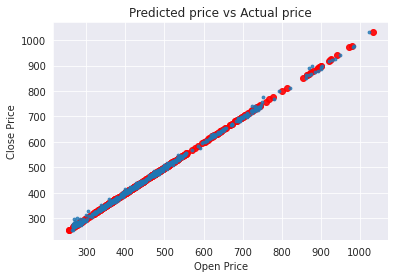

In [ ]:
# Linear Regression
plt.scatter(preds1, test_df['Close'], alpha=0.9,color='red')
plt.scatter(test_targets,test_df['Close'],s=8,alpha=0.8)
plt.title('Predicted price vs Actual price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')

In the above graph red and blue dots are overlaping. So that we can say that linear regression performs the best on this dataset.

Text(0, 0.5, 'Close Price')

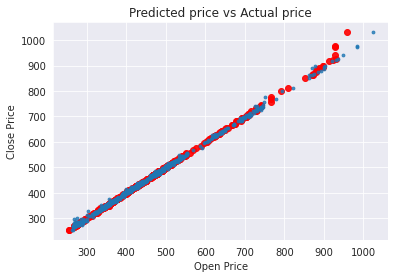

In [ ]:
# Gradient Boosting Machine
plt.scatter(preds2, test_df['Close'], alpha=0.9,color='red')
plt.scatter(test_targets,test_df['Close'],s=8,alpha=0.8)
plt.title('Predicted price vs Actual price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')

In the above graph we can see some outliers in between 800 to 1000. So that Gradient Booting Machine performs lower than the Linear Regression model.

Text(0, 0.5, 'Close Price')

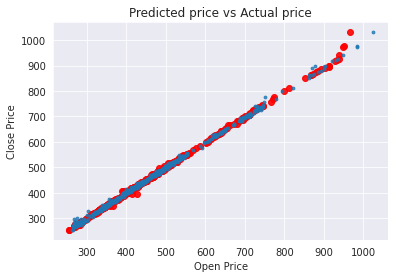

In [ ]:
# Random Forest Regression
plt.scatter(preds3, test_df['Close'], alpha=0.9,color='red')
plt.scatter(test_targets,test_df['Close'],s=8,alpha=0.8)
plt.title('Predicted price vs Actual price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')

In the above graph again we can see some outliers in between 750 to 1000. So that we can say that Random Forest performs lower than the Linear Regression model.

#Predict On Single Input

And at the end we also predict the Open price of single input using all three models.

In [ ]:
def predict_input(model, single):
  input_df = pd.DataFrame([single])
  input_df[input_cols] = scaler.transform(input_df[input_cols])
  pred = model.predict(input_df)[0]
  return pred

single = {'High':1332	,'Low':1312	,'Close':1326.05 ,'Volume':5730244} # data of Nov 03, 2021
print(predict_input(model1,single))
print(predict_input(model2,single))
print(predict_input(model3,single))

1327.6661478613073
957.30524
944.8671296296305
